In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cleaned_data.csv')

In [3]:
df

Unnamed: 0 diagnosis  radius    texture  perimeter         area  \
0             0         B  13.540  14.360000      87.46   566.300000   
1             1         B  13.080  15.710000      85.63   520.000000   
2             2         B   9.504  12.440000      60.34   566.269744   
3             3         B  13.030  18.420000      82.61   523.800000   
4             4         B   8.196  16.840000      51.71   201.900000   
..          ...       ...     ...        ...        ...          ...   
389         561         M  15.050  19.070000      97.26   701.900000   
390         562         M  18.310  20.580000     120.80  1052.000000   
391         565         M  19.890  20.260000     130.50   566.269744   
392         569         M  14.270  22.550000      93.77   629.800000   
393         576         M  16.600  18.489084     108.30   858.100000   

     smoothness  compactness  concavity  concave_points  ...  texture_worst  \
0      0.097790      0.08129    0.06664        0.047810  ...          19.26   
1      0.107500      0.12700    0.04568        0.031100  ...          20.49   
2      0.102400      0.06492    0.02956        0.020760  ...          15.66   
3      0.089830      0.03766    0.02562        0.029230  ...          22.81   
4      0.093417      0.05943    0.01588        0.005917  ...          21.96   
..          ...          ...        ...             ...  ...            ...   
389    0.092150      0.08597    0.07486        0.043350  ...          28.06   
390    0.106800      0.12480    0.15690        0.094510  ...          26.20   
391    0.103700      0.13100    0.14110        0.094310  ...          25.23   
392    0.103800      0.11540    0.14630        0.061390  ...          34.27   
393    0.084550      0.10230    0.09251        0.053020  ...          34.12   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0              99.70       711.2           0.14400            0.17730   
1              96.09       630.5           0.13120            0.27760   
2              65.13       314.9           0.13240            0.11480   
3              84.46       545.9           0.09701            0.04619   
4              57.26       242.2           0.12970            0.13570   
..               ...         ...               ...                ...   
389           113.80       967.0           0.12460            0.21010   
390           142.20      1493.0           0.14920            0.25360   
391           160.50      1646.0           0.14170            0.33090   
392           104.30       728.3           0.13800            0.27330   
393           126.70      1124.0           0.11390            0.30940   

     concavity_worst  concave_points_worst  symmetry_worst  \
0            0.23900               0.12880          0.2977   
1            0.18900               0.07283          0.3184   
2            0.08867               0.06227          0.2450   
3            0.04833               0.05013          0.1987   
4            0.06880               0.02564          0.3105   
..               ...                   ...             ...   
389          0.28660               0.11200          0.2282   
390          0.37590               0.15100          0.3074   
391          0.41850               0.16130          0.2549   
392          0.42340               0.13620          0.2698   
393          0.34030               0.14180          0.2218   

     fractal_dimension_worst  diagnosis_numeric_new  
0                    0.07259                      0  
1                    0.08183                      0  
2                    0.07773                      0  
3                    0.06169                      0  
4                    0.07409                      0  
..                       ...                    ...  
389                  0.06954                      1  
390                  0.07863                      1  
391                  0.09136                      1  
392                  0.08351 

In [4]:
df.columns

Index(['Unnamed: 0', 'diagnosis', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry',
       'fractal_dimension', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worse', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'diagnosis_numeric_new'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

# Removing  of the highly correlated variables

<AxesSubplot:>

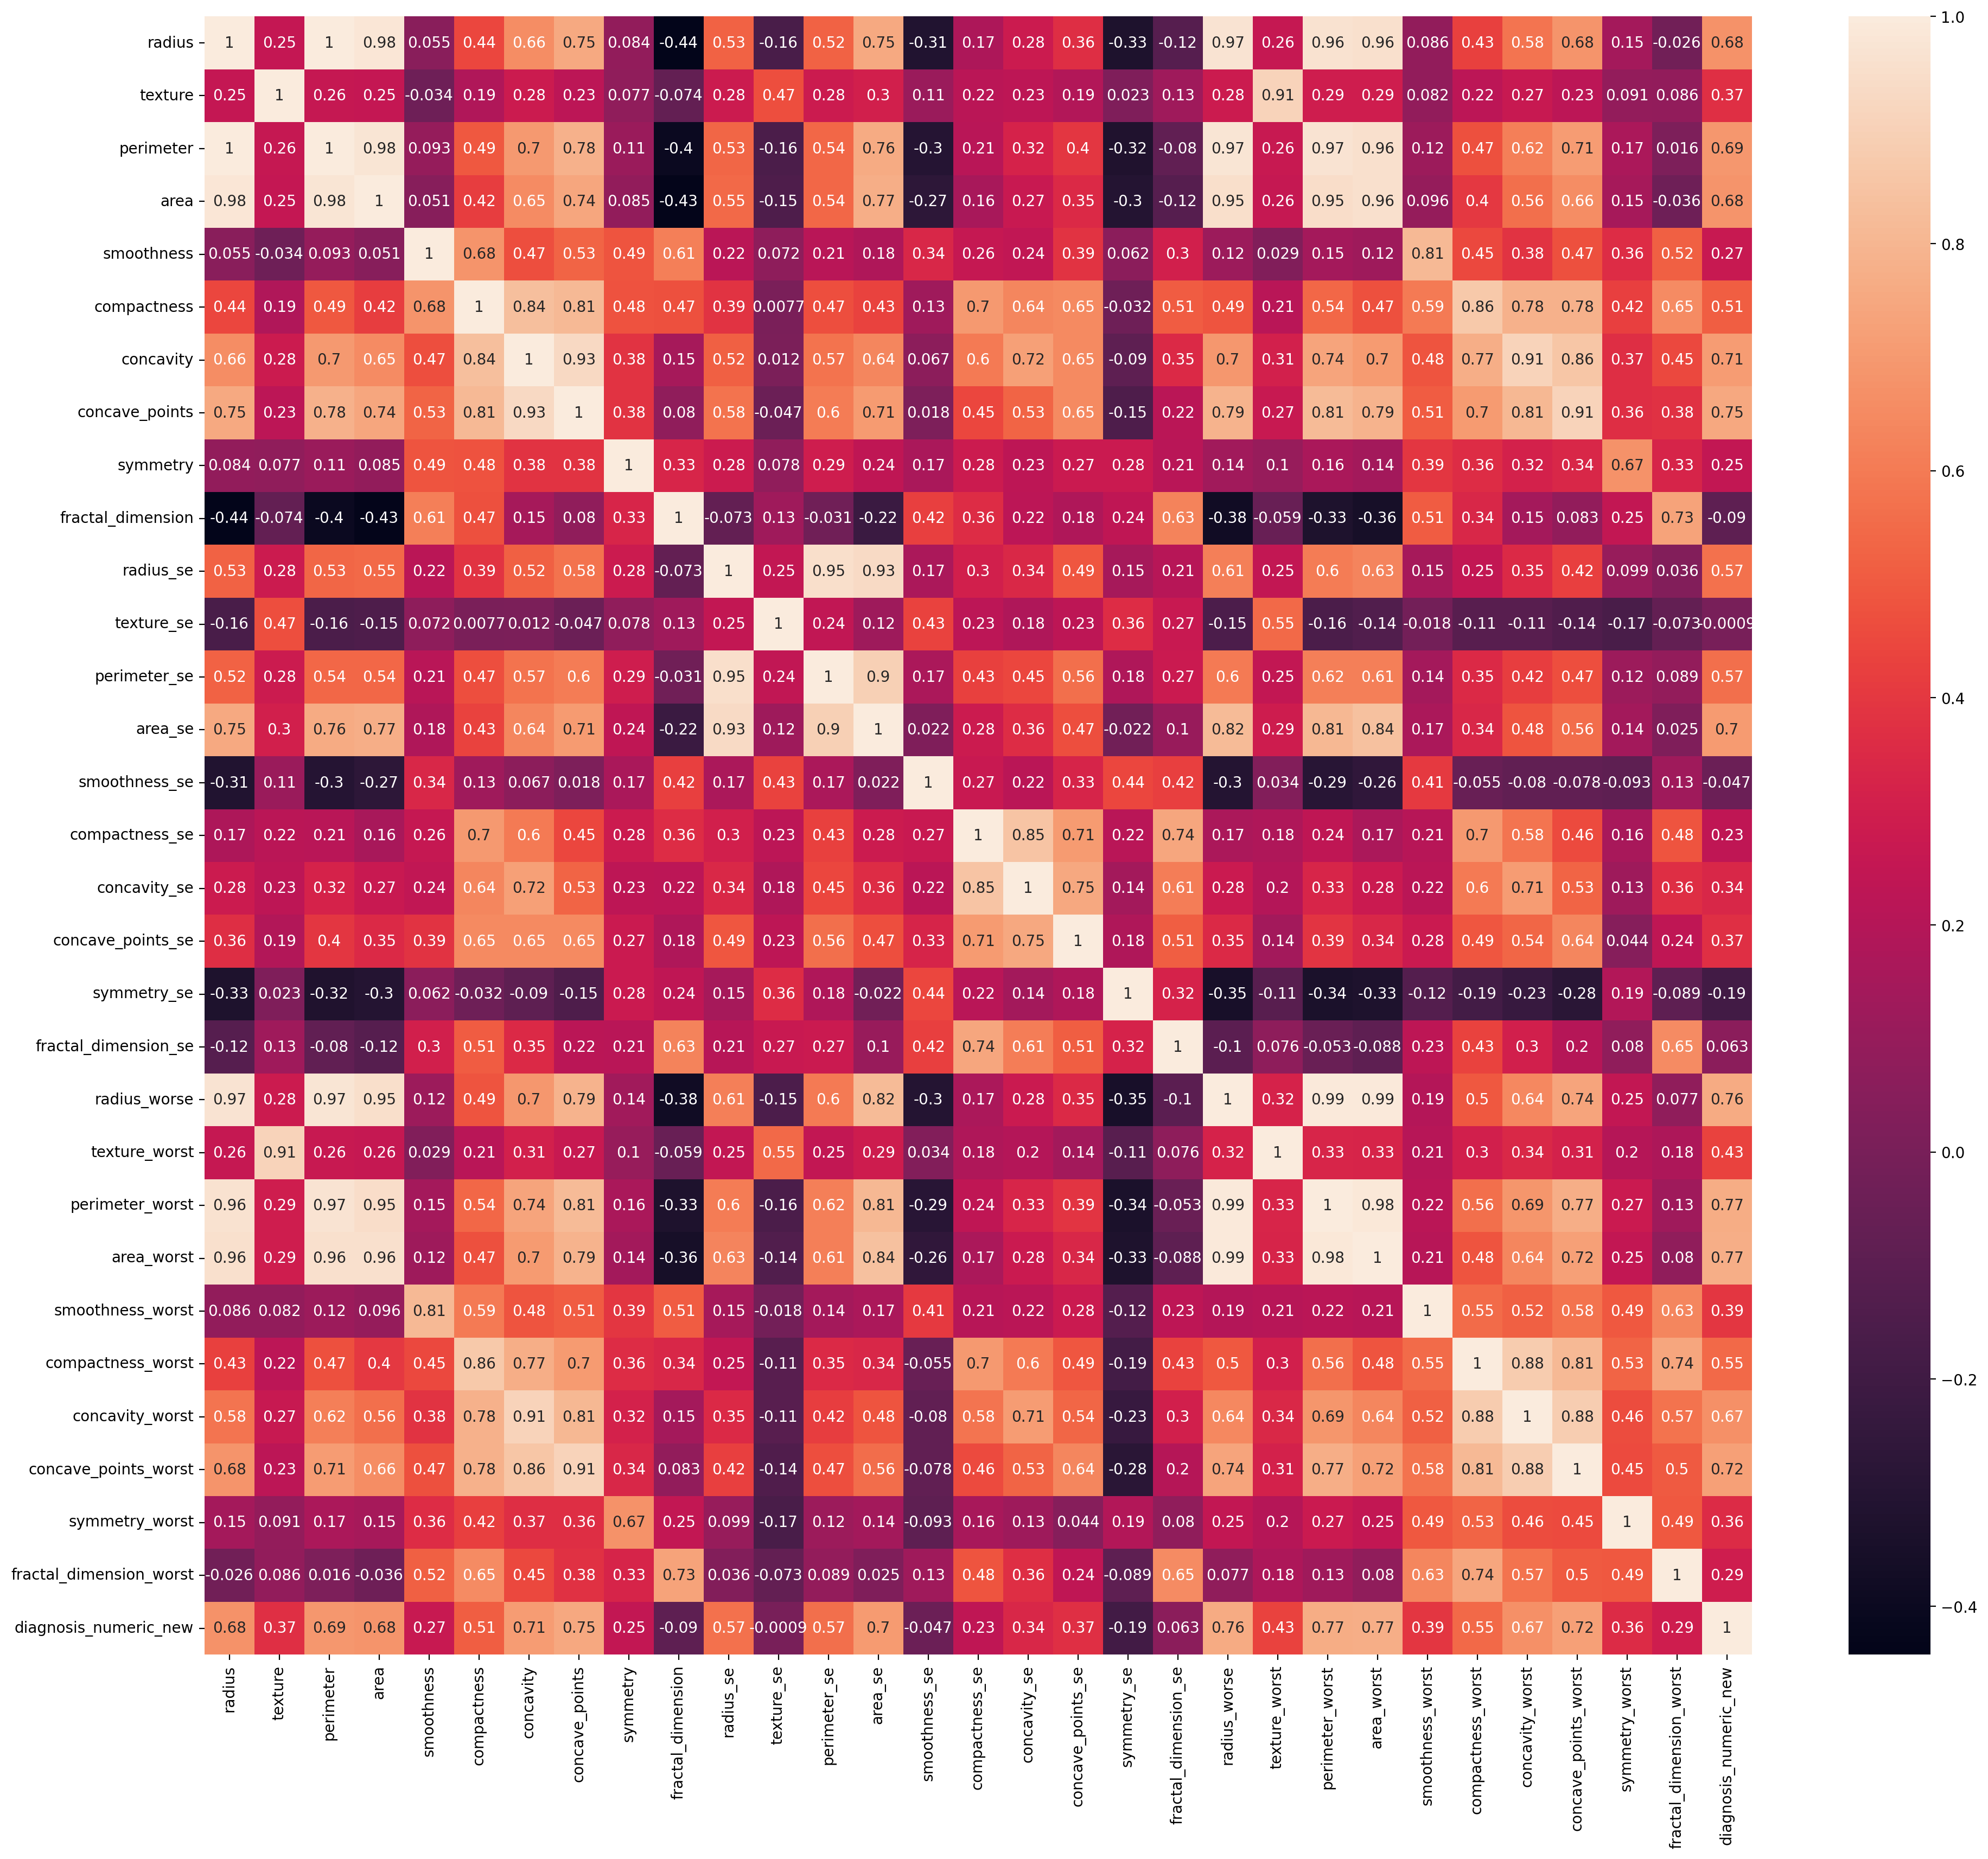

In [6]:
f,ax=plt.subplots(figsize=(23,20),dpi=200)
sns.heatmap(df.corr(),annot=True)

In [7]:
# the following function will select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [8]:
corr_features = correlation(df, 0.8)
len(set(corr_features))

15

In [9]:
corr_features


{'area',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave_points',
 'concave_points_worst',
 'concavity',
 'concavity_se',
 'concavity_worst',
 'perimeter',
 'perimeter_se',
 'perimeter_worst',
 'radius_worse',
 'smoothness_worst',
 'texture_worst'}

In [10]:
df.drop(corr_features,axis=1,inplace=True)

In [11]:
df

diagnosis  radius    texture  smoothness  compactness  symmetry  \
0           B  13.540  14.360000    0.097790      0.08129   0.18850   
1           B  13.080  15.710000    0.107500      0.12700   0.19670   
2           B   9.504  12.440000    0.102400      0.06492   0.18150   
3           B  13.030  18.420000    0.089830      0.03766   0.14670   
4           B   8.196  16.840000    0.093417      0.05943   0.17690   
..        ...     ...        ...         ...          ...       ...   
389         M  15.050  19.070000    0.092150      0.08597   0.15610   
390         M  18.310  20.580000    0.106800      0.12480   0.18600   
391         M  19.890  20.260000    0.103700      0.13100   0.18020   
392         M  14.270  22.550000    0.103800      0.11540   0.17368   
393         M  16.600  18.489084    0.084550      0.10230   0.15900   

     fractal_dimension  radius_se  texture_se  smoothness_se  compactness_se  \
0              0.05766     0.2699      0.7886       0.008462        0.014600   
1              0.06811     0.1852      0.7477       0.004097        0.018980   
2              0.06905     0.2773      0.9768       0.009606        0.014320   
3              0.05863     0.1839      2.3420       0.004352        0.004899   
4              0.06503     0.1563      0.9567       0.008968        0.016460   
..                 ...        ...         ...            ...             ...   
389            0.05915     0.3860      1.1980       0.004952        0.016300   
390            0.05941     0.5449      0.9225       0.006176        0.018770   
391            0.06188     0.5079      0.8737       0.005089        0.023030   
392            0.05982     0.2027      1.8510       0.006113        0.025830   
393            0.05648     0.4564      1.0750       0.005903        0.037310   

     concave_points_se  symmetry_se  fractal_dimension_se  symmetry_worst  \
0             0.013150      0.01980              0.002300          0.2977   
1             0.006490      0.01678              0.002425          0.3184   
2             0.014210      0.02027              0.002968          0.2450   
3             0.011640      0.02671              0.001777          0.1987   
4             0.005917      0.02574              0.002582          0.3105   
..                 ...          ...                   ...             ...   
389           0.009423      0.01152              0.001718          0.2282   
390           0.010460      0.01559              0.002725          0.3074   
391           0.011780      0.01057              0.003391          0.2549   
392           0.012760      0.01451              0.003756          0.2698   
393           0.015570      0.01318              0.003892          0.2218   

     fractal_dimension_worst  diagnosis_numeric_new  
0                    0.07259                      0  
1                    0.08183                      0  
2                    0.07773                      0  
3                    0.06169                      0  
4                    0.07409                      0  
..                       ...                    ...  
389                  0.06954                      1  
390                  0.07863                      1  
391                  0.09136                      1  
392                  0.08351                      1  
393                  0.07820                      1  

[394 rows x 17 columns]

In [12]:
len(df.columns)

17

# Logistic Regression

In [13]:
df.drop('diagnosis',axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius                   394 non-null    float64
 1   texture                  394 non-null    float64
 2   smoothness               394 non-null    float64
 3   compactness              394 non-null    float64
 4   symmetry                 394 non-null    float64
 5   fractal_dimension        394 non-null    float64
 6   radius_se                394 non-null    float64
 7   texture_se               394 non-null    float64
 8   smoothness_se            394 non-null    float64
 9   compactness_se           394 non-null    float64
 10  concave_points_se        394 non-null    float64
 11  symmetry_se              394 non-null    float64
 12  fractal_dimension_se     394 non-null    float64
 13  symmetry_worst           394 non-null    float64
 14  fractal_dimension_worst  3

In [15]:
X = df.drop('diagnosis_numeric_new',axis=1)
y = df['diagnosis_numeric_new']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_model = LogisticRegression()

In [22]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

# Grid search

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid = GridSearchCV(log_model,param_grid,cv=10)

In [25]:
grid.fit(scaled_X_train,y_train)

C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED L

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}])

In [26]:
grid.best_params_

{'C': 0.08858667904100823,
 'max_iter': 100,
 'penalty': 'none',
 'solver': 'saga'}

In [27]:
predictions = grid.predict(scaled_X_test)

In [28]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Performance Evaluation

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.87      0.83      0.85        24

    accuracy                           0.94       119
   macro avg       0.91      0.90      0.91       119
weighted avg       0.94      0.94      0.94       119



C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


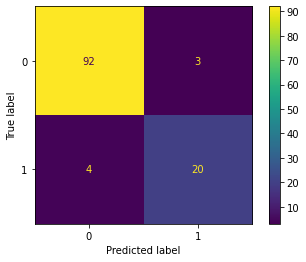

In [31]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [32]:
accuracy_score(y_test,predictions)

0.9411764705882353

In [33]:
confusion_matrix(y_test,predictions)

array([[92,  3],
       [ 4, 20]], dtype=int64)

In [34]:
from sklearn.metrics import plot_roc_curve

# AUC/ROC curve

C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


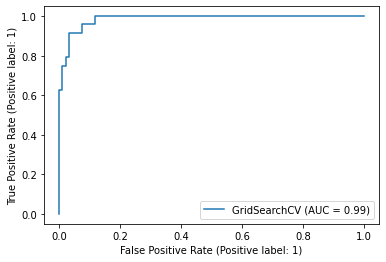

In [35]:
plot_roc_curve(grid,scaled_X_test,y_test)

# Random Forest


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier()

# Grid Search

In [38]:
n_estimators=[64,100,128,200]
max_features= [2,3,4,5,6,7,8]
bootstrap = [True,False]
oob_score = [True,False]

In [39]:
param_grid_rfc = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [40]:
grid_rfc = GridSearchCV(rfc,param_grid_rfc)

In [41]:
grid_rfc.fit(X_train,y_train)

C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=Tr

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [42]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': False}

In [43]:
predictions_rfc = grid_rfc.predict(X_test)

# Performance Evaluation

In [44]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.95      0.88      0.91        24

    accuracy                           0.97       119
   macro avg       0.96      0.93      0.95       119
weighted avg       0.97      0.97      0.97       119



C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


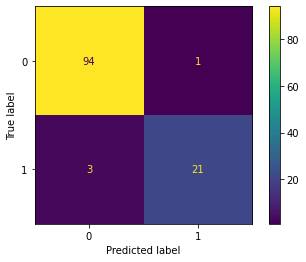

In [45]:
plot_confusion_matrix(grid_rfc,X_test,y_test)

In [46]:
accuracy_score(y_test,predictions_rfc)

0.9663865546218487

In [47]:
confusion_matrix(y_test,predictions_rfc)

array([[94,  1],
       [ 3, 21]], dtype=int64)

# AUC/ROC curve

C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


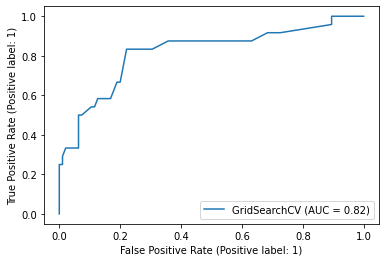

In [48]:
plot_roc_curve(grid_rfc,scaled_X_test,y_test)

# AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
model_adaboost = AdaBoostClassifier()

# Grid Search

In [51]:
n_estimators=[10,50,100,500,600]
algorithm=['SAMME','SAMME.R']


In [52]:
param_grid_ada_boost = {'n_estimators':n_estimators,
             'algorithm':algorithm,
           }

In [53]:
grid_ada_boost = GridSearchCV(model_adaboost,param_grid_ada_boost,cv=10)

In [54]:
grid_ada_boost.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [10, 50, 100, 500, 600]})

In [55]:
grid_ada_boost.best_params_

{'algorithm': 'SAMME', 'n_estimators': 100}

In [56]:
predictions_ada_boost = grid_ada_boost.predict(X_test)

# Performance evaluation

In [57]:
print(classification_report(y_test,predictions_ada_boost))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        95
           1       0.88      0.88      0.88        24

    accuracy                           0.95       119
   macro avg       0.92      0.92      0.92       119
weighted avg       0.95      0.95      0.95       119



In [58]:
accuracy_score(y_test,predictions_ada_boost)

0.9495798319327731

C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


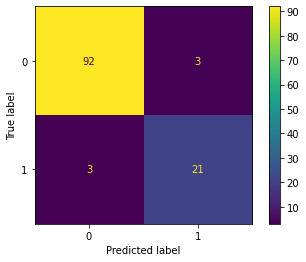

In [59]:
plot_confusion_matrix(grid_ada_boost,X_test,y_test)

# AUC/ROC CURVE

C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


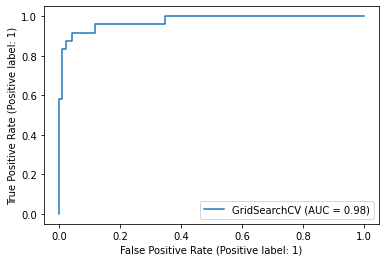

In [60]:
plot_roc_curve(grid_ada_boost,X_test,y_test)

# Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Grid Search

In [62]:
param_grid_gb = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [63]:
gb_model = GradientBoostingClassifier()

In [64]:
grid_gb = GridSearchCV(gb_model,param_grid_gb)

In [65]:
grid_gb.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [66]:
grid_gb.best_params_

{'max_depth': 3, 'n_estimators': 40}

In [67]:
predictions_gb = grid_gb.predict(X_test)

# Performance Evaluation

In [68]:
print(classification_report(y_test,predictions_gb))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        95
           1       0.86      0.79      0.83        24

    accuracy                           0.93       119
   macro avg       0.91      0.88      0.89       119
weighted avg       0.93      0.93      0.93       119



In [69]:
accuracy_score(y_test,predictions_gb)

0.9327731092436975

C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


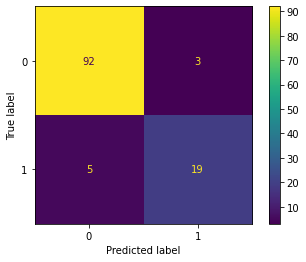

In [70]:
plot_confusion_matrix(grid_gb,X_test,y_test)

# AUC/ROC curve

C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


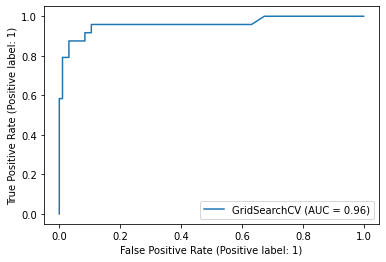

In [71]:
plot_roc_curve(grid_gb,X_test,y_test)

# K-Nearest-Neighbors

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier()


# Grid Search

In [74]:
k_values = list(range(1,20))

In [75]:
param_grid_knn = {'n_neighbors': k_values,
             'weights':['uniform','distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
            }

In [76]:
grid_knn = GridSearchCV(knn,param_grid_knn,cv=5)

In [77]:
grid_knn.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [78]:
grid_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}

In [79]:
predictions_knn = grid_knn.predict(scaled_X_test)

# Performance Evaluation

In [80]:
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        95
           1       0.91      0.83      0.87        24

    accuracy                           0.95       119
   macro avg       0.93      0.91      0.92       119
weighted avg       0.95      0.95      0.95       119



C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


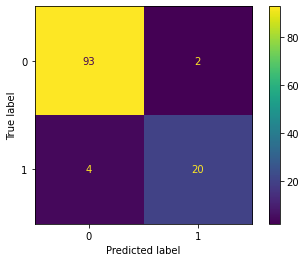

In [81]:
plot_confusion_matrix(grid_knn,scaled_X_test,y_test)

In [82]:
accuracy_score(y_test,predictions_knn)

0.9495798319327731

In [83]:
confusion_matrix(y_test,predictions_knn)

array([[93,  2],
       [ 4, 20]], dtype=int64)

# AUC/ROC curve

C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


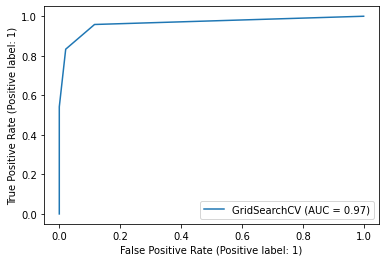

In [84]:
plot_roc_curve(grid_knn,scaled_X_test,y_test)

# Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
nb=GaussianNB()

# Grid Search

In [87]:
param_grib_nb={'var_smoothing':np.logspace(0,-9)}

In [88]:
nb_grid=GridSearchCV(nb,param_grib_nb,verbose=1,cv=10)

In [89]:
nb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 6.55128557e-01, 4.29193426e-01, 2.81176870e-01,
       1.84206997e-01, 1.20679264e-01, 7.90604321e-02, 5.17947468e-02,
       3.39322177e-02, 2.22299648e-02, 1.45634848e-02, 9.54095476e-03,
       6.25055193e-03, 4.09491506e-03, 2.68269580e-03, 1.75751062e-03,
       1.15139540e-03, 7.54312006e-04, 4.9...
       3.90693994e-05, 2.55954792e-05, 1.67683294e-05, 1.09854114e-05,
       7.19685673e-06, 4.71486636e-06, 3.08884360e-06, 2.02358965e-06,
       1.32571137e-06, 8.68511374e-07, 5.68986603e-07, 3.72759372e-07,
       2.44205309e-07, 1.59985872e-07, 1.04811313e-07, 6.86648845e-08,
       4.49843267e-08, 2.94705170e-08, 1.93069773e-08, 1.26485522e-08,
       8.28642773e-09, 5.42867544e-09, 3.55648031e-09, 2.32995181e-09,
       1.52641797e-09, 1.00000000e-09])},
             verbose=1)

In [90]:
nb_grid.best_params_

{'var_smoothing': 0.0017575106248547913}

In [91]:
predictions_nb = nb_grid.predict(X_test)

# Performance Evaluation

In [92]:
print(classification_report(y_test,predictions_nb))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        95
           1       0.86      0.79      0.83        24

    accuracy                           0.93       119
   macro avg       0.91      0.88      0.89       119
weighted avg       0.93      0.93      0.93       119



C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


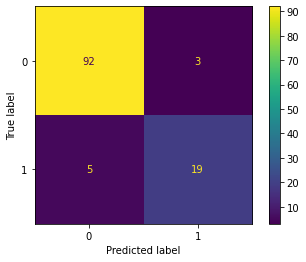

In [93]:
plot_confusion_matrix(nb_grid,X_test,y_test)

In [94]:
accuracy_score(y_test,predictions_nb)

0.9327731092436975

In [95]:
confusion_matrix(y_test,predictions_nb)

array([[92,  3],
       [ 5, 19]], dtype=int64)

# AUC/ROC curve

C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


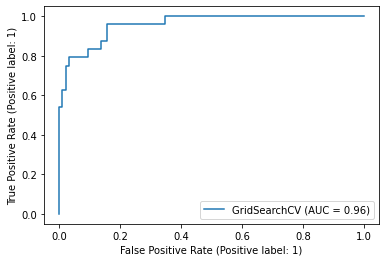

In [96]:
plot_roc_curve(nb_grid,X_test,y_test)

# Ensemble

In [98]:
from sklearn.ensemble import VotingClassifier

In [102]:
ensemble_model=VotingClassifier(estimators=[('lr',grid),('rf',grid_rfc),('ada_boost',grid_ada_boost),('gb',grid_gb),('knn',grid_knn),('nb',nb_grid)],voting='hard')

In [103]:
ensemble_model.fit(X_train,y_train)

C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 10 folds for each of 50 candidates, totalling 500 fits


VotingClassifier(estimators=[('lr',
                              GridSearchCV(cv=10,
                                           estimator=LogisticRegression(),
                                           param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5...
       3.90693994e-05, 2.55954792e-05, 1.67683294e-05, 1.09854114e-05,
       7.19685673e-06, 4.71486636e-06, 3.08884360e-06, 2.02358965e-06,
       1.32571137e-06, 8.68511374e-07, 5.68986603e-07, 3.72759372e-07,
       2.44205309e-07, 1.59985872e-07, 1.04811313e-07, 6.86648845e-08,
       4.49843267e-08, 2.94705170e-08, 1.93069773e-08, 1.26485522e-08,
       8.28642773e-09, 5.42867544e-09, 3.55648031e-09, 2.32995181e-09,
       1.52641797e-09, 1.00000000e-09])},
              

In [105]:
predictions_ensemble = ensemble_model.predict(scaled_X_test)

C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

In [106]:
print(classification_report(y_test,predictions_ensemble))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        95
           1       1.00      0.04      0.08        24

    accuracy                           0.81       119
   macro avg       0.90      0.52      0.49       119
weighted avg       0.84      0.81      0.73       119



C:\Users\Chandana\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


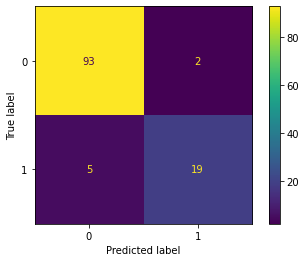

In [107]:
plot_confusion_matrix(ensemble_model,X_test,y_test)

In [108]:
accuracy_score(y_test,predictions_ensemble)

0.8067226890756303